In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import importers
import fbprophet
import sklearn
import cpi
import seaborn as sns

import prepare
import explore
#needed for matplotlib to handle plotting pandas
pd.plotting.register_matplotlib_converters()


<Figure size 640x480 with 1 Axes>

INFO:cpi:Parsing data files from the BLS


### Acquire 

#### Coffee Data

We initially attempted to use ICO data to produce a model that would predict the global commodity coffee price. Very quickly, we found this question to be impossibly broad, and instead to focus on one country, Colombia.

ICO's data was insufficiently specific, and it only went back until 1990. We began searching for other data sources and ultimately found the National Federation of Coffee Growers of Colombia, commonly abbreviated FedCafe.

After some difficulty with the language barrier, we downloaded a few Excel files that detailed the export coffee prices for Excelso coffee. Excelso is a size grading of coffee which is the second largest bean. This is the most commonly exported Colombian coffee bean.

#### Weather Data

In [2]:
df = prepare.get_data()

### Prep

In [3]:
df2 = prepare.get_prepped()

### Exploration

After acquiring and cleaning the data, we started to explore what our chosen features looked like over time for the top 13 coffee producing regions of Colombia. Each coffee producing region is then separated into one of three zones, the Northern zone, the Central zone, and the Southern one.

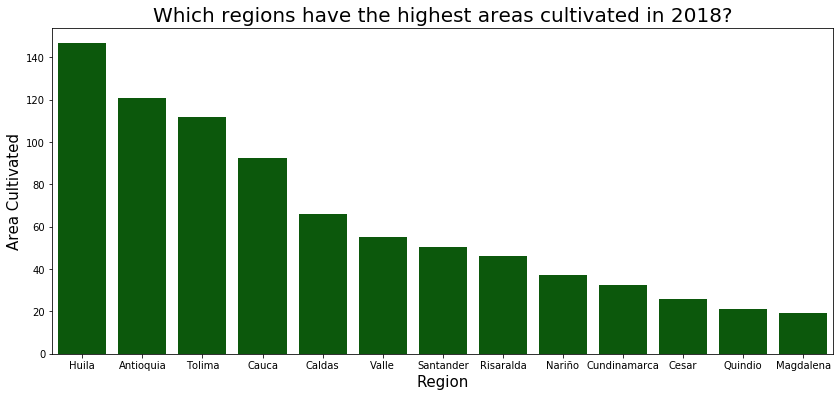

In [4]:
# Look at price distribution per region
explore.area_cultivated()

**Takeaways:** 
- Hulia, located in the southern coffee zone of Colombia, has the largest area of cultivated land for coffee production. (estimate of how many coffee farms are in huila)
- Antioquia and Tolima follow in second and third place, both located in the Central zone of coffee production. (estimate of farms in both combined)

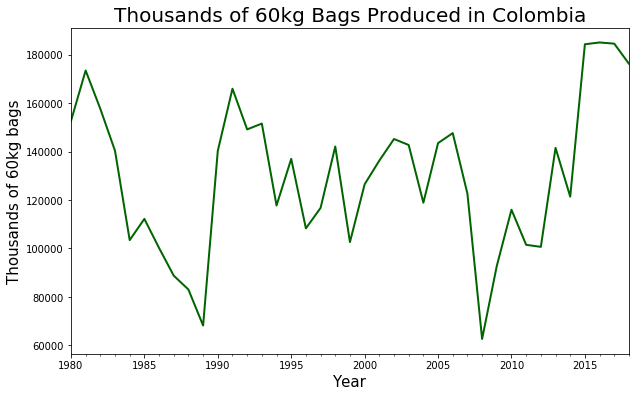

In [5]:
# Production by region 1980-2018
explore.production_graph(df)

#### Initial exploration showed significant volatility in coffee production and precipitation. We also looked at the volatility in average temperature compared to coffee production to look for any correlation between the features and our target.

*Average Precipitation*

Average Precipitation by Region of Colombia


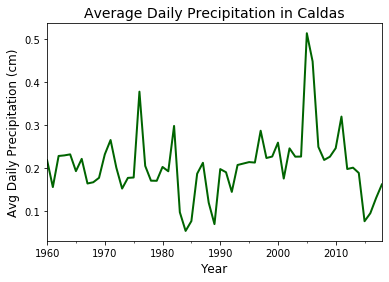

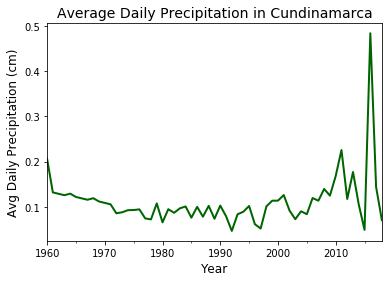

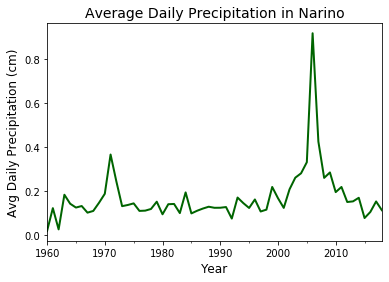

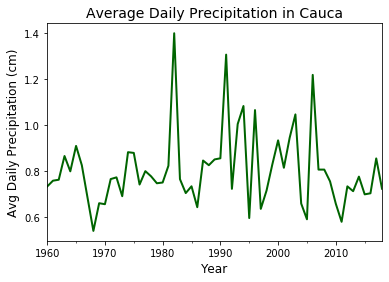

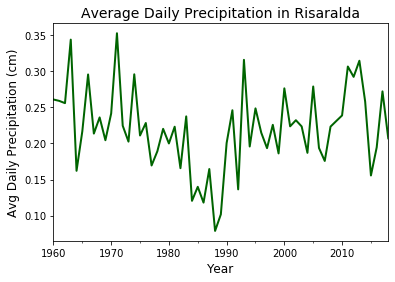

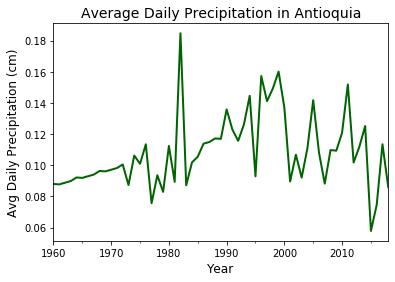

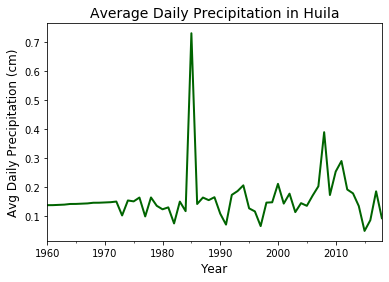

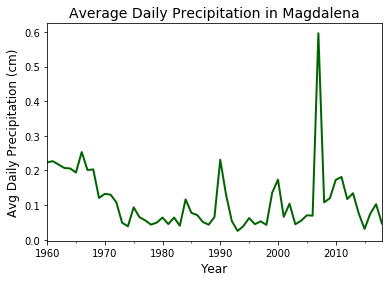

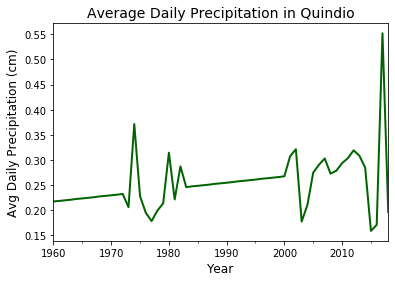

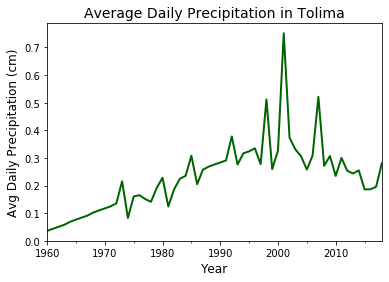

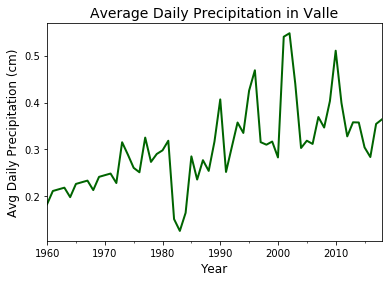

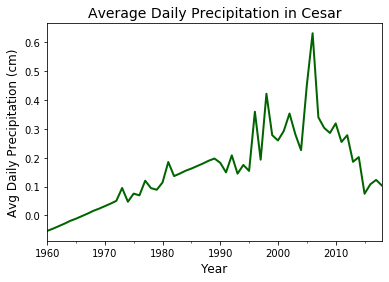

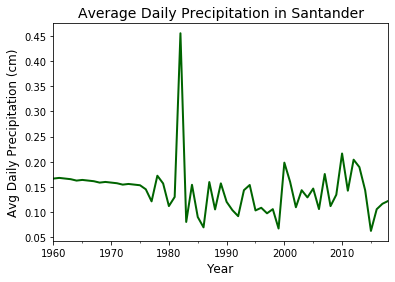

In [6]:
# Precipitation by region
explore.precipitation_by_region(df2)

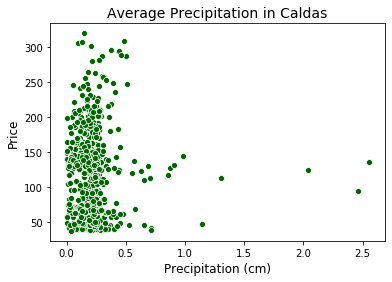

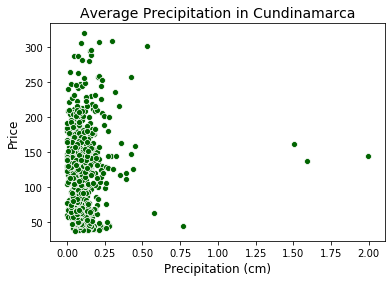

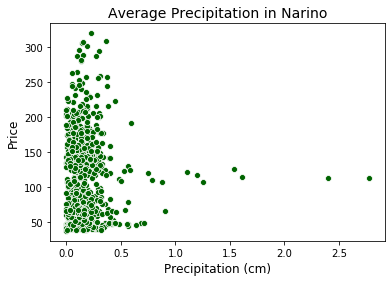

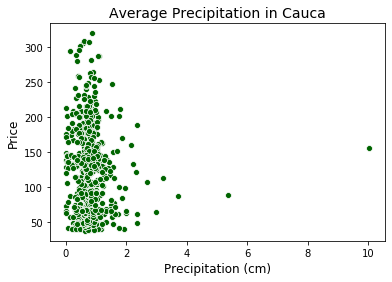

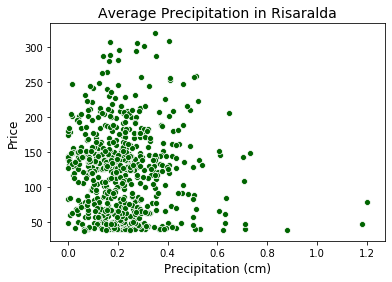

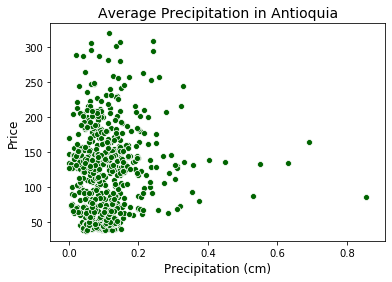

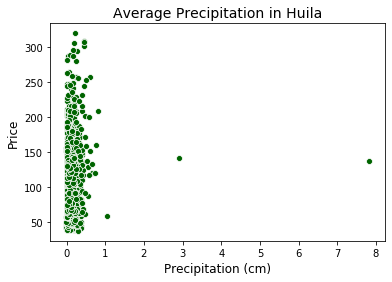

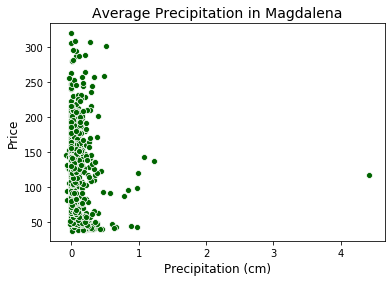

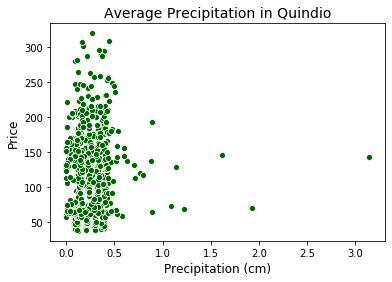

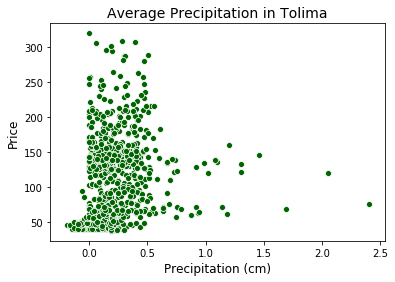

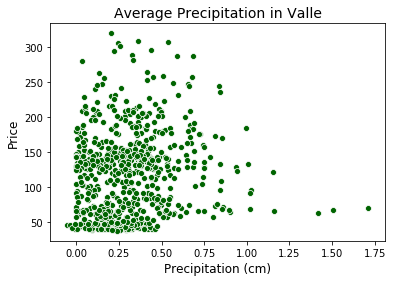

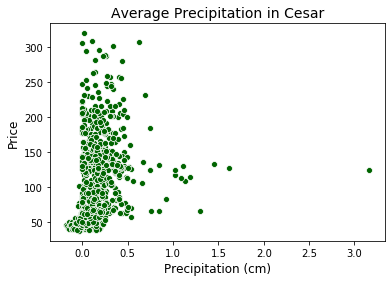

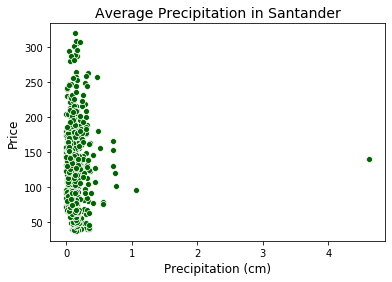

In [7]:
# Does the average precipitation by region correlate with inflated price of coffee?
explore.corr_price_and_precip(df2)

In [8]:
# Using Pearson's R to look at the correlation between average precipitaion and inflated price 
explore.corr_precip_price(df2)

r = 0.02862259252813459
P = 0.44701090559232365


**Takeaways:** The average precipitation is slightly different for each region. When looking at the correlation between the average precipitation and price of coffee exported, most of the regions have the same shape, with the precipitation falling between 0 and 1 cm and spread out pretty evenly between $50 - 300 USD. 

*Average Temperature*

Average Temperature by Region of Colombia


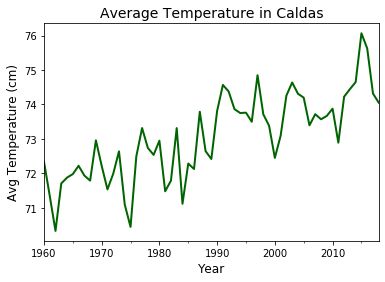

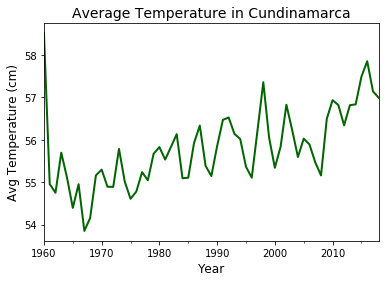

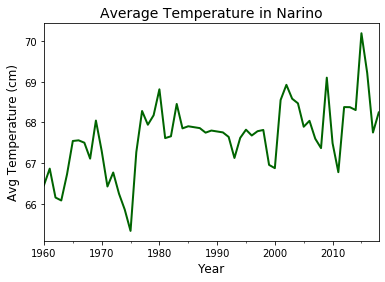

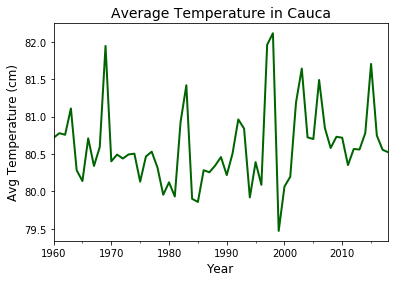

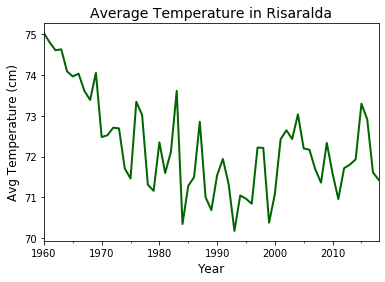

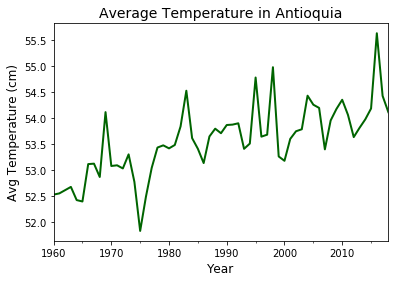

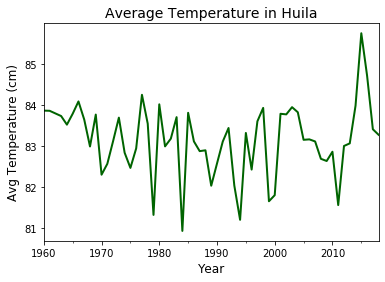

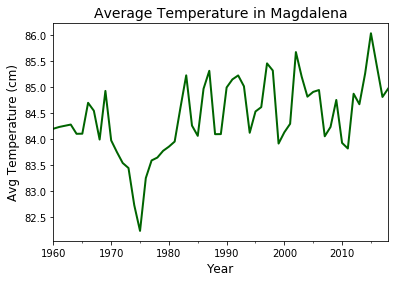

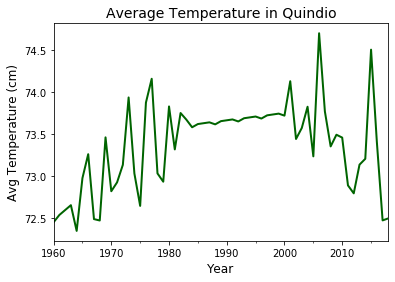

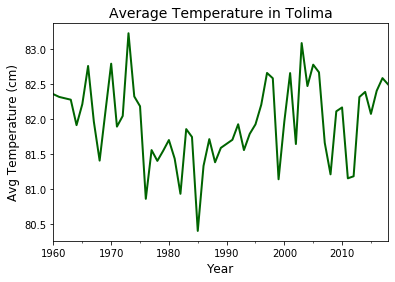

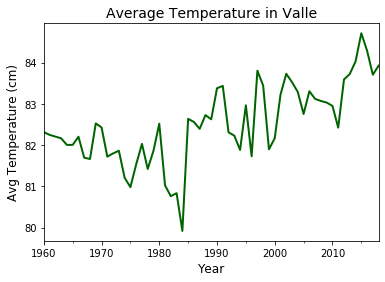

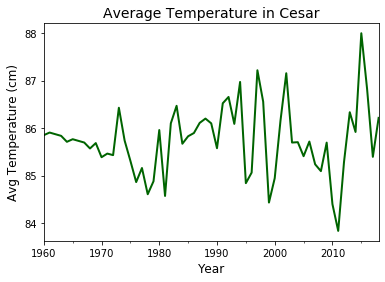

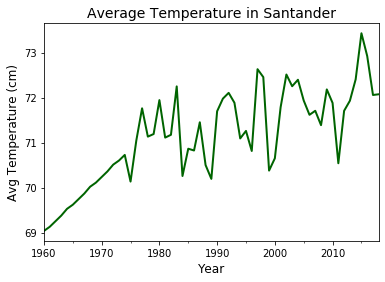

In [9]:
#Average temperature by region
explore.avg_temp_by_region(df2)

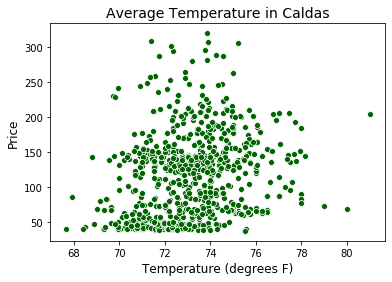

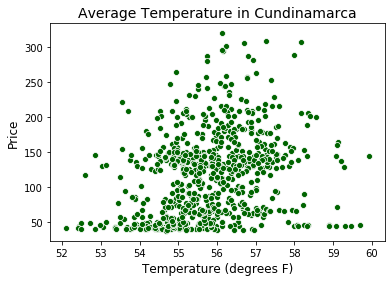

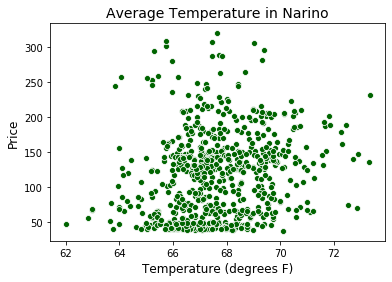

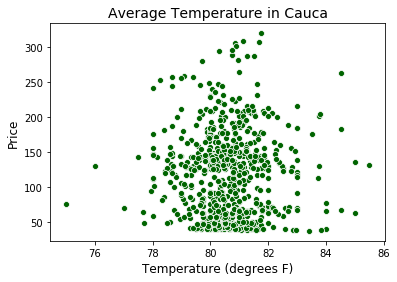

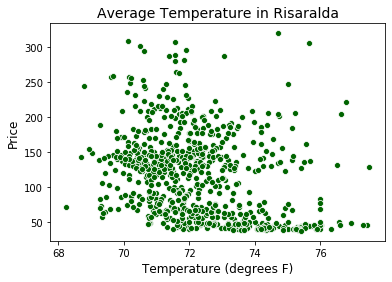

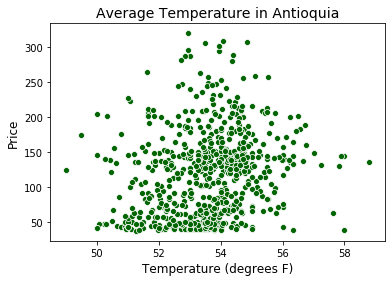

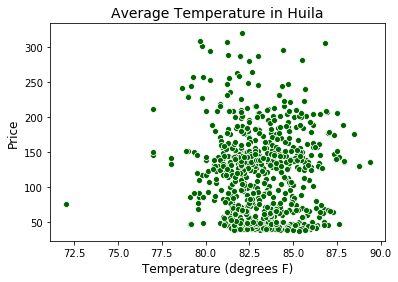

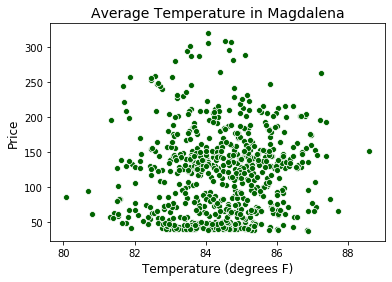

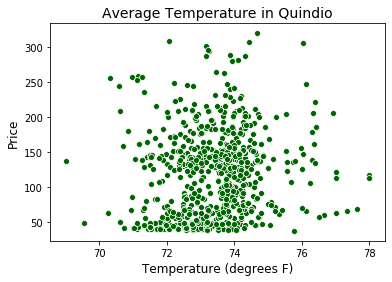

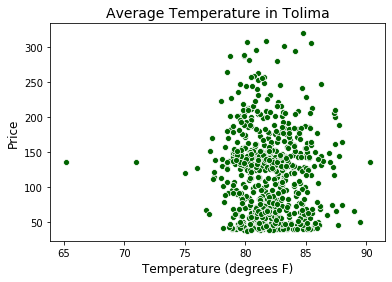

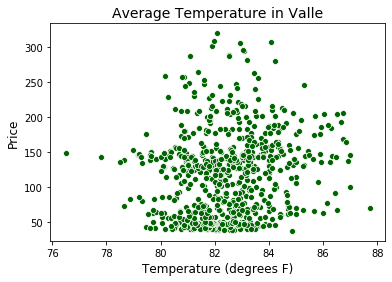

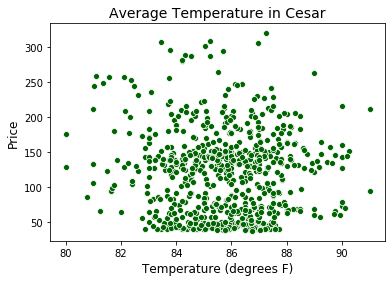

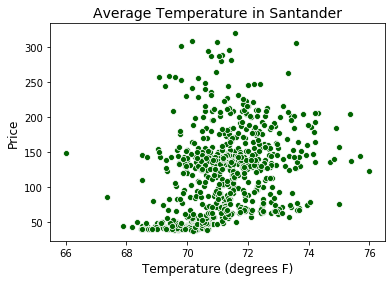

In [10]:
# Does the average temperature by region correlate with inflated price of coffee?
explore.corr_price_and_temp(df2)

In [11]:
# Using Pearson's R to look at the correlation between average temperature and inflated price 
explore.corr_temp_price(df2)

r = -0.24021073035679108
p = 9.459836216848994e-11


**Takeaways:** Most of the regions have a general upward trend in their average temperatures over time. When looking at the correlation between the average temperature per region and coffee prices, there are no obvious correlations, but rather a cluster in the middle of the graph. 

#### With further exploration into where the price spikes were taking place, we discovered that major weather events were better at predicting when the price would change drastically than day-to-day weather.

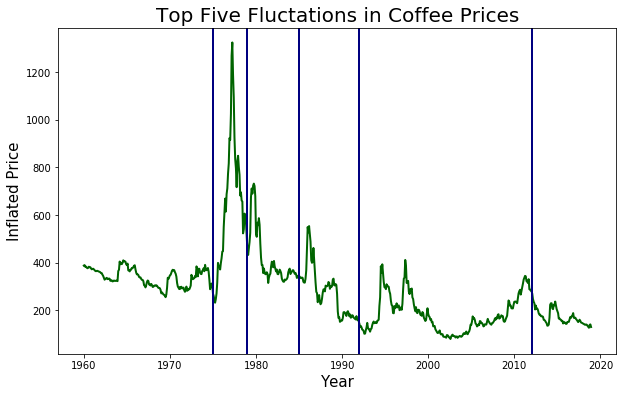

In [12]:
# Looking at possible causes of dramatic changes to price over time in data
explore.events_over_time(df2)
# replace this graph

**Takeaways:** The largest price spike in our data took place around 1975. After the peak of the spike, about 3 years later, the distribution of price evens out over time. considering We then wanted to take a closer look at the exported price in data after the distribution smooths out. 

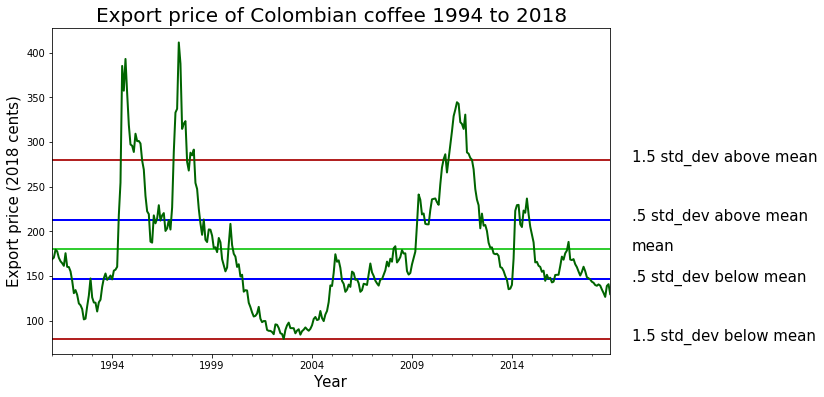

In [13]:
explore.export_price_1991_2018(df2)

**Takeaways:** add here

#### The Observatory of Economic Complexity Data Exploration
After acquisition and preparation of the OEC's data, we wanted to explore Colombia's export quantities compared to other countries exports and attempt to uncover trends within the data. 
Initially, we compared Colombia's exports to that of Brazil's, looking to see if there were any indicators from Brazil's exports that would move Colombia's exports in a particular direction. As noticed in the graph below, there are no pre-movement indicators from Brazil's production. 

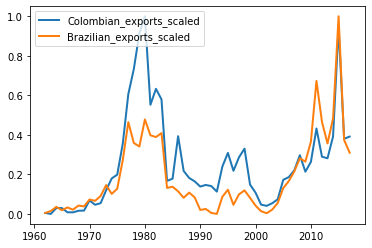

In [14]:
# Comparing the distributions of Colombia's exports to Brazil's exports
importers.compare_brazil()

#### Top 10 importers of Colombian coffee between 1962 and 2017. 

In [15]:
# What countries are the top impoters of Colombian coffee?
importers.compare_import_change()
### change date on the second graph
### adjust size 

TypeError: compare_import_change() missing 1 required positional argument: 'year'

#### Correlating Volatility
We also wanted to see if the increased volatility of a prior years production numbers would increase the volatility of next year's price. 

**To Do:** TO BE CONTINUED

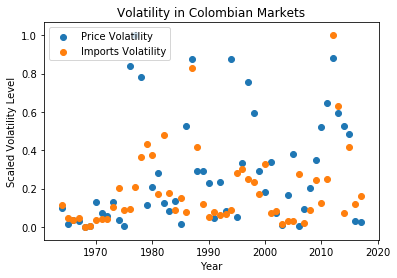

In [16]:
# Looking at the correlation in volatility between ...
importers.get_volatility_graph()
# adjust size

In [ ]:
# add statistical testing here to back this up

In [ ]:
#corr

##### Exploratory models




We discovered a noticeable shift in 

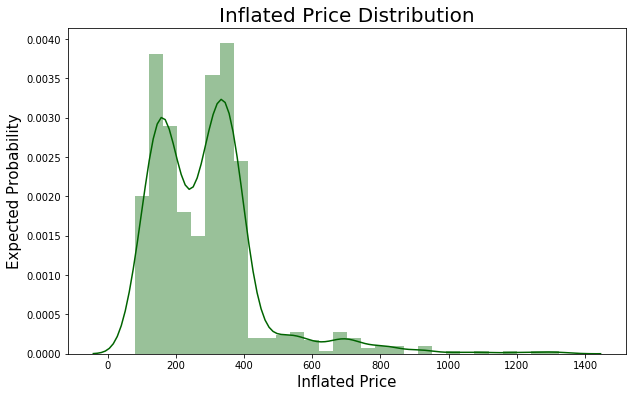

In [17]:
#After reviewing the data distribution we saw that the pricing was bimodal
#Splitting the data for modeling was greatly improved based on this analysis
explore.dist_of_price(df2)

**Takeaways:** 

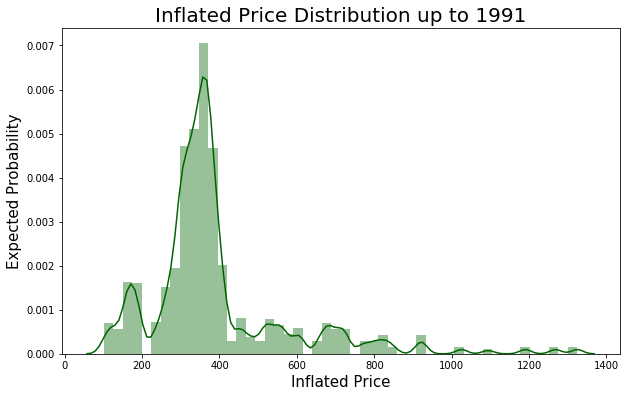

In [18]:
#pre 1991
explore.dist_before(df)

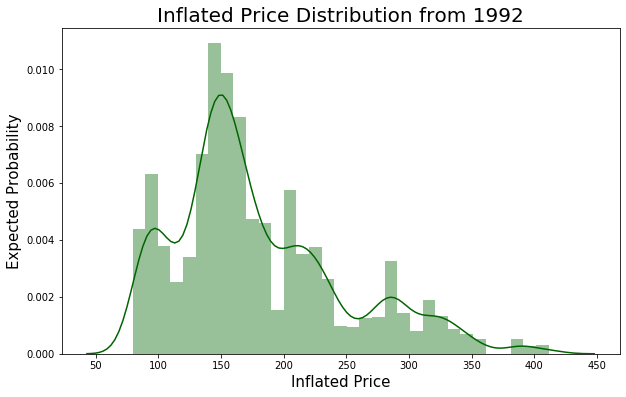

In [19]:
#post 1991
explore.dist_after(df)

**Takeaways:**

### Model

### Conclusions